# Convolution Neural Networks

CNNs are neural networks known for their performance on image datasets. They are characterized by something called a convolutional layer that can detect abstract features of an image. These images can be shifted, squashed, or rotated; if a human can still recognize the features, a CNN likely can too.

---

![CNN base image](../images/cnn_base-img.webp)

An image is a big array of pixel activation values. These arrays are followed by more arrays of (initially random) values – the weights – that we call a “filter” or “kernel”. A convolutional layer is an element-wise multiplication between these pixel values and the filter weights – which are then summed.

---
![Element wise cnn opt](../images/element-wise-cnn-opt.webp)

![5x5 img example](../images/5x5-filter-eg.webp)

---
We don’t return a single scalar value because we perform many of these operations on each layer. For each convolutional layer, the filter slides (or “convolves”) over the previous layer’s matrix (or image) from left-to-right and top-to-bottom.

<video width="560" height="315" 
       src="../images/cnn-convolve.mp4"  
       controls>
</video>

---
The filter can detect specific local features such as edges, shapes, and textures by sliding over the image.

---
The convolution output is called a “feature map” or “activation map” thanks to the representation or activations of detected features from the input layer.

As the element-wise multiplication of the filter outputs a single value after processing multiple input values, we need to be mindful of excessive information loss via dimensionality reduction (i.e., compression).

We may want to increase or decrease the amount of compression our filters create. Compression is controlled using the filter size and how quickly it moves across the image (the stride).

<video width="560" height="315" 
       src="../images/filter-map-eg.mp4"  
       controls>
</video>

The stride defines the number of pixels a filter moves after every calculation. By increasing the stride, the filter will travel across the entire input image in fewer steps, outputting fewer values and producing a more compressed feature map.

---

<video width="560" height="315" 
       src="../images/cnn-stride.mp4"  
       controls>
</video>

**Activation Functions**
![CNN Relu better](../images/cnn-relu-better.webp)
>The authors of AlexNet noted that results from a four-layer CNN with ReLU activation functions reached a 25% error rate on the CIFAR-10 dataset six times faster than the equivalent with Tanh

# Pooling Layers
Output feature maps are highly sensitive to small changes in the location of input features. To some degree, this can be useful, as it can tell us the difference between a cat’s face and a dog’s face. However, if an eye is two pixels further to the left than expected, the model should still be able to identify a face.

CNNs use pooling layers to handle this. Pooling layers are a downsampling method that compresses information from one layer into a smaller space in the next layer.

An effect of pooling is that information across several pixels is compressed into a single activation, essentially “smoothing out” variations across groups (or patches) of pixels.

The two most common pooling methods are average pooling and max pooling. Average pooling takes the average of activations in the window, whereas max pooling takes their maximum value.

![CNN Pooling](../images/cnn-pooling.webp)


# Fully-Connected Layers
Fully connected linear layers are another common feature of CNNs. They are neural networks in their most stripped-down form; the dot product between inputs X and layer weights W with a bias term b and activation function.


![Fully connected layer](../images/cnn-fully-conected.webp)

---
These layers are usually found towards the end of a CNN and handle the transformation of CNN embeddings from 3D tensors to more understandable outputs like class predictions.

Often within these final layers, we will find the most information-rich vector representations of the data being input to the model. 

# Popular CNN Architecture

## LeNet
LeNet is the earliest example of a “deep” CNN, developed in 1998 by Yann LeCun, et. al. Many of us have likely interacted with LeNet as Bell Labs licensed it to banks around the globe for reading the digits on handwritten cheques.
![LetNet](../images/cnn-lenet.webp)

---
## VGGNET
AlexNet was dethroned as the winner of ILSVRC in 2014 with the introduction of VGGNet, developed at Oxford University [5]. Many variants of VGGNet were developed, characterized by the number of layers they contained, such as 16 total layers (13 convolutional) for VGGNet-16, and 19 total layers for VGGNet-19.
![VGGnet](../images/cnn-vggnet.webp)
- The first pooling is a 2x2 max pooling with a stride of 2 and no padding. (Simple 224/2 = 122)
- At first convolution 128 filters with kernel of size 3 x 3 results in 244x244x128
- Then pooling is done using the size of 2×2 and a stride of 2 resulting in 122 x 122 x 128
- At the fully connected layer we have 1x1x4096 (meaning a single pixel and this layer has 4096 neurons with ReLu). This is the result of flattening 7x7x512 convolution layer's output

**Reson for 1x1**
The spatial dimensions (1x1) result from global downsampling by earlier layers.
At this stage, the network no longer focuses on "where" something is in the image but rather on "what" the object is (a high-level feature abstraction).

# Converting Img to Vectors

In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
img_path = '../images/cat-7210553_1280.jpg'

In [29]:
image = Image.open(img_path)  # Load the image

In [30]:
image.mode

'RGB'

In [31]:
def show_img(image):
    plt.imshow(image)
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

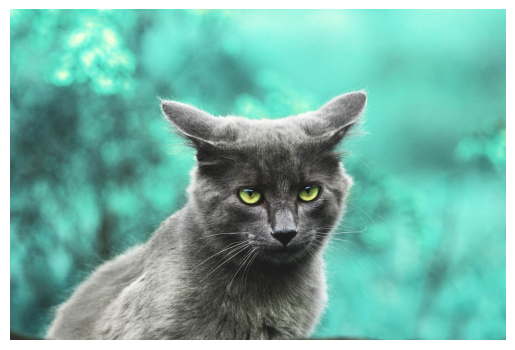

In [32]:
show_img(image)

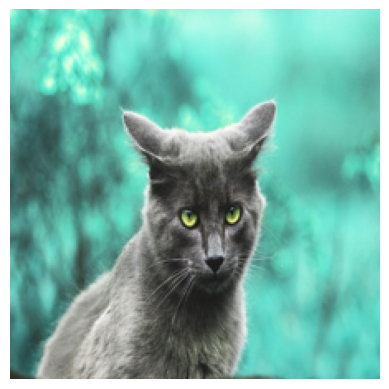

In [33]:
image = image.resize((224, 224))  # Resize to 224x224
show_img(image)

In [34]:
image_array = np.array(image)  # Convert to NumPy array

In [35]:
image_array

array([[[187, 252, 217],
        [166, 249, 217],
        [139, 244, 214],
        ...,
        [126, 233, 213],
        [125, 232, 212],
        [125, 233, 212]],

       [[182, 252, 219],
        [164, 250, 215],
        [151, 247, 215],
        ...,
        [125, 232, 212],
        [124, 231, 211],
        [124, 233, 212]],

       [[173, 252, 219],
        [157, 249, 214],
        [147, 244, 213],
        ...,
        [123, 230, 210],
        [122, 230, 209],
        [122, 231, 210]],

       ...,

       [[ 48,  51,  42],
        [ 48,  53,  44],
        [ 50,  57,  46],
        ...,
        [ 79, 192, 178],
        [ 79, 190, 176],
        [ 83, 185, 173]],

       [[ 49,  49,  42],
        [ 48,  49,  41],
        [ 48,  50,  43],
        ...,
        [ 77, 187, 173],
        [ 77, 182, 168],
        [ 81, 173, 160]],

       [[ 47,  47,  40],
        [ 48,  49,  40],
        [ 47,  49,  42],
        ...,
        [ 73, 178, 164],
        [ 71, 171, 157],
        [ 75, 162, 149]]

In [36]:
image_array = image_array / 255.0  # Normalize pixel values to [0, 1]
image_array.shape

(224, 224, 3)

In [37]:
image_array

array([[[0.73333333, 0.98823529, 0.85098039],
        [0.65098039, 0.97647059, 0.85098039],
        [0.54509804, 0.95686275, 0.83921569],
        ...,
        [0.49411765, 0.91372549, 0.83529412],
        [0.49019608, 0.90980392, 0.83137255],
        [0.49019608, 0.91372549, 0.83137255]],

       [[0.71372549, 0.98823529, 0.85882353],
        [0.64313725, 0.98039216, 0.84313725],
        [0.59215686, 0.96862745, 0.84313725],
        ...,
        [0.49019608, 0.90980392, 0.83137255],
        [0.48627451, 0.90588235, 0.82745098],
        [0.48627451, 0.91372549, 0.83137255]],

       [[0.67843137, 0.98823529, 0.85882353],
        [0.61568627, 0.97647059, 0.83921569],
        [0.57647059, 0.95686275, 0.83529412],
        ...,
        [0.48235294, 0.90196078, 0.82352941],
        [0.47843137, 0.90196078, 0.81960784],
        [0.47843137, 0.90588235, 0.82352941]],

       ...,

       [[0.18823529, 0.2       , 0.16470588],
        [0.18823529, 0.20784314, 0.17254902],
        [0.19607843, 0

## Add a Batch Dimension
CNNs process data in batches. If you’re working with a single image, add a batch dimension (e.g., shape becomes 1×224×224×3).

In [38]:
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array.shape

(1, 224, 224, 3)

## Converting image to grayscale

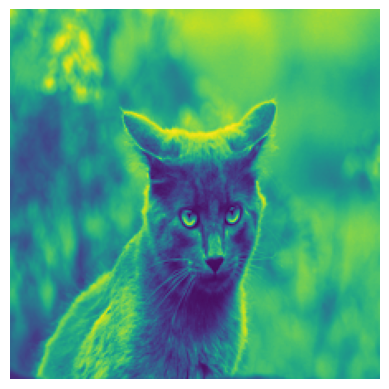

In [39]:
image_gray = image.convert('L')  # Convert to grayscale
show_img(image_gray)

For VGG net, we may need extra preprocessing.

In [40]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [41]:
image_array = preprocess_input(image_array)

In [42]:
image_array

array([[[[-103.08801961, -115.79076471, -122.94666667],
         [-103.08801961, -115.80252941, -123.02901961],
         [-103.09978431, -115.82213725, -123.13490196],
         ...,
         [-103.10370588, -115.86527451, -123.18588235],
         [-103.10762745, -115.86919608, -123.18980392],
         [-103.10762745, -115.86527451, -123.18980392]],

        [[-103.08017647, -115.79076471, -122.96627451],
         [-103.09586275, -115.79860784, -123.03686275],
         [-103.09586275, -115.81037255, -123.08784314],
         ...,
         [-103.10762745, -115.86919608, -123.18980392],
         [-103.11154902, -115.87311765, -123.19372549],
         [-103.10762745, -115.86527451, -123.19372549]],

        [[-103.08017647, -115.79076471, -123.00156863],
         [-103.09978431, -115.80252941, -123.06431373],
         [-103.10370588, -115.82213725, -123.10352941],
         ...,
         [-103.11547059, -115.87703922, -123.19764706],
         [-103.11939216, -115.87703922, -123.20156863],
  

In [43]:
image_array.shape

(1, 224, 224, 3)

# OCR using CNN

In [44]:
from sklearn.datasets import load_digits

In [45]:
data = load_digits(as_frame=True)

In [46]:
df = data.frame

In [47]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


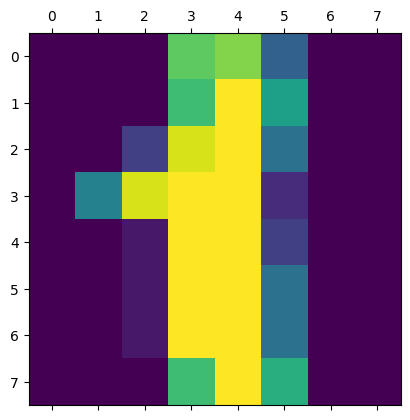

In [48]:
plt.matshow(data.images[1])
plt.show()

In [49]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [50]:
data.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [51]:
df.shape

(1797, 65)

## Data Preprocessing

In [52]:
X = data.images  # Image data, shape: (1797, 8, 8)
y = data.target 

In [53]:
X = X / 16.0  # Pixel values range from 0 to 16; normalize to [0, 1]

In [54]:
X.shape

(1797, 8, 8)

In [55]:
X = np.expand_dims(X, axis=-1)  # Shape: (1797, 8, 8, 1)
X.shape

(1797, 8, 8, 1)

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
y.to_numpy()

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
y = to_categorical(y, num_classes=10)  # Shape: (1797, 10)

In [59]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Model Creation

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
import tensorflow as tf

In [63]:
model = tf.keras.Sequential([
    # Convolutional Layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    # Pooling Layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten Layer
    tf.keras.layers.Flatten(),
    # Fully Connected Layer
    tf.keras.layers.Dense(units=128, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(units=10, activation='softmax')  # 10 classes for digits 0–9
])

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,602 (150.79 KB)

 Trainable params: 38,602 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

Trainable Parameters=(Kh × Kw × Cin + 1)×Fout  
- Kh and Kw are the height and width of the filter (kernel size).  
- 𝐶in is the number of input channels (e.g., 3 for RGB images).  
- 𝐹out is the number of filters (output channels).  
- The +1 accounts for the bias for each filter.  

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [66]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2221 - loss: 2.2318 - val_accuracy: 0.7639 - val_loss: 1.9424
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7588 - loss: 1.7993 - val_accuracy: 0.8611 - val_loss: 1.4083
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8205 - loss: 1.2144 - val_accuracy: 0.8542 - val_loss: 0.8748
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8694 - loss: 0.7068 - val_accuracy: 0.8889 - val_loss: 0.5341
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8988 - loss: 0.4670 - val_accuracy: 0.8889 - val_loss: 0.4244
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9149 - loss: 0.3537 - val_accuracy: 0.9236 - val_loss: 0.3106
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9403 - loss: 0.2643 - val_accuracy: 0.9444 - val_loss: 0.2607
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9381 - loss: 0.2499 - val_accuracy: 0.9375 - val_loss

In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Result Visualization

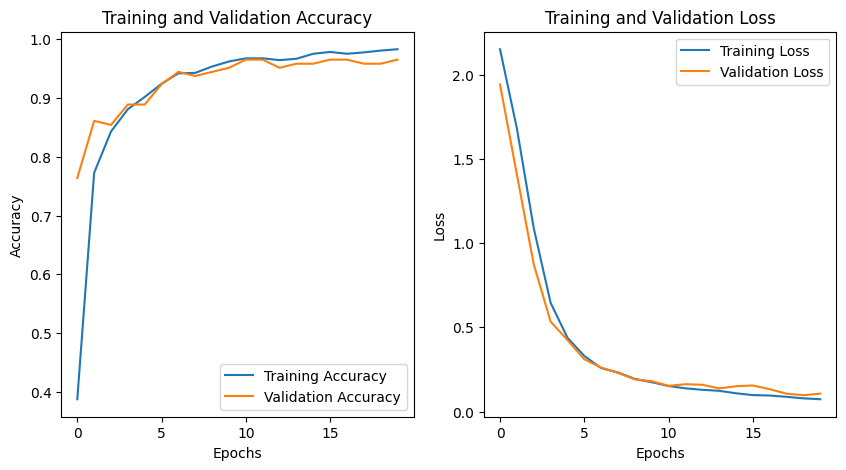

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
plt.show()

## Accuracy test in Test Set

In [69]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9734 - loss: 0.0906 


In [70]:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.39%


In [71]:
print(f"Test Loss: {test_loss * 100:.2f}%")

Test Loss: 9.60%


## Prediction

In [72]:
pred_prob = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [73]:
pred_prob

array([[2.0736644e-04, 4.7236163e-06, 1.3581484e-06, ..., 1.3085747e-06,
        7.3076884e-04, 3.9759202e-06],
       [6.2222802e-04, 2.3086199e-04, 1.0946191e-06, ..., 2.4162863e-04,
        1.4023851e-03, 9.5877588e-01],
       [2.7734168e-07, 4.6607615e-06, 1.4058179e-04, ..., 1.9938299e-05,
        8.1318824e-05, 2.1110578e-05],
       ...,
       [1.8610675e-02, 7.4916624e-04, 2.4028688e-03, ..., 2.5986375e-02,
        9.2743826e-01, 1.2810712e-02],
       [1.6024539e-03, 2.0974945e-05, 5.3241751e-03, ..., 7.0258568e-05,
        1.0111163e-03, 2.2102413e-03],
       [1.0012500e-03, 7.1220711e-07, 5.8956260e-07, ..., 9.2302835e-06,
        2.9436093e-05, 3.6417530e-03]], dtype=float32)

In [74]:
pred_prob[0]

array([2.0736644e-04, 4.7236163e-06, 1.3581484e-06, 1.8601542e-06,
       3.9489410e-04, 2.7409149e-04, 9.9837977e-01, 1.3085747e-06,
       7.3076884e-04, 3.9759202e-06], dtype=float32)

In [75]:
predicted_labels = np.argmax(pred_prob, axis=1)
predicted_labels

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 4, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 2, 5,
       5, 1, 4, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 3, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# Saving Models

In [77]:
model.save('./models/ocr-cnn.keras')

In [78]:
!du -sh ./models/

484K	./models/


# Loading Model

In [79]:
loaded_model = tf.keras.models.load_model('./models/ocr-cnn.keras')

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [80]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,206 (301.59 KB)

 Trainable params: 38,602 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,604 (150.80 KB)

In [81]:
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.0906  


In [84]:
for layer in loaded_model.layers:
    print(f"Layer: {layer.name}")
    print("Weights:")
    for weight in layer.trainable_weights:
        print(weight.name, weight.shape)

Layer: conv2d
Weights:
kernel (3, 3, 1, 32)
bias (32,)
Layer: max_pooling2d
Weights:
Layer: flatten
Weights:
Layer: dense
Weights:
kernel (288, 128)
bias (128,)
Layer: dense_1
Weights:
kernel (128, 10)
bias (10,)


In [85]:
loaded_model.layers[0]

<Conv2D name=conv2d, built=True>

In [94]:
loaded_model.layers[0].trainable_weights[0]

<Variable path=conv2d/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[ 2.07961604e-01  1.17628582e-01  5.31806834e-02 -1.50303617e-01
    -9.98732373e-02  5.75187802e-02  2.45781332e-01  1.59565538e-01
     1.92931339e-01 -2.84029067e-01  2.30108052e-01  1.44187212e-01
    -2.29404956e-01  1.22887209e-01 -3.62078585e-02  1.98265061e-01
    -5.02942689e-02 -2.21465468e-01  1.80281013e-01  1.57299027e-01
     7.99243804e-04  1.30873546e-01 -9.11493078e-02 -8.44305102e-03
    -1.50130726e-02  2.17746168e-01  1.29379734e-01 -2.18088418e-01
    -1.67057544e-01  2.76334971e-01  1.82111174e-01  1.61178410e-01]]

  [[-1.28413767e-01  1.93224713e-01  1.69955805e-01 -2.99872071e-01
     1.97278380e-01 -7.24135935e-02  2.65145719e-01  2.39423752e-01
     1.96957260e-01 -3.12761575e-01 -2.13926733e-01  2.23559022e-01
    -3.65363210e-01  1.83931828e-01  1.86502039e-01  2.65589833e-01
    -5.47068790e-02  1.62945494e-01  1.00812837e-01  6.95722103e-02
     2.59494066e-01  2.97092885e-01 -3.66